<a href="https://colab.research.google.com/github/5655530/AIFFEL_CORE_QUEST/blob/main/2_1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Step 1. 데이터셋 내려받기**

In [15]:
import tensorflow_datasets as tfds
import tensorflow as tf

(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

## **Step 2. 데이터셋 준비하기**

In [16]:
IMG_SIZE = 160

def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

## **Step 3. 모델 설계하기**

In [17]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(5, activation='softmax')
])

## **Step 4. 모델 학습시키기**

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_batches,
                    epochs=10,
                    validation_data=validation_batches)

Epoch 1/10
92/92 [==============================] - 90s 863ms/step - loss: 0.6842 - accuracy: 0.7565 - val_loss: 0.4364 - val_accuracy: 0.8583
Epoch 2/10
92/92 [==============================] - 67s 709ms/step - loss: 0.3452 - accuracy: 0.8893 - val_loss: 0.3673 - val_accuracy: 0.8883
Epoch 3/10
92/92 [==============================] - 65s 697ms/step - loss: 0.2623 - accuracy: 0.9125 - val_loss: 0.3318 - val_accuracy: 0.8883
Epoch 4/10
92/92 [==============================] - 64s 685ms/step - loss: 0.2173 - accuracy: 0.9346 - val_loss: 0.3227 - val_accuracy: 0.8910
Epoch 5/10
92/92 [==============================] - 60s 647ms/step - loss: 0.1811 - accuracy: 0.9479 - val_loss: 0.3185 - val_accuracy: 0.8856
Epoch 6/10
92/92 [==============================] - 62s 674ms/step - loss: 0.1568 - accuracy: 0.9588 - val_loss: 0.3067 - val_accuracy: 0.8965
Epoch 7/10
92/92 [==============================] - 61s 648ms/step - loss: 0.1375 - accuracy: 0.9670 - val_loss: 0.3094 - val_accuracy: 0.8992

## **Step 5. 모델 성능 평가하기**

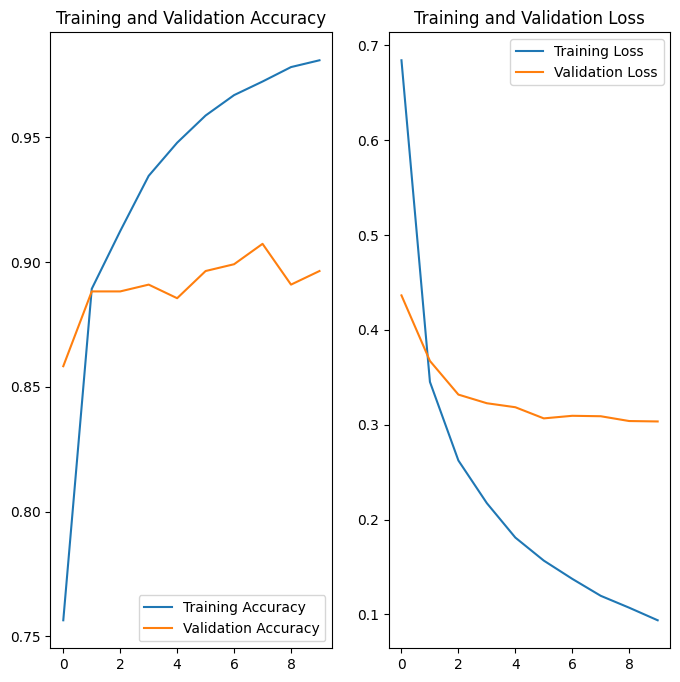

In [19]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## **Step 6. 모델 활용하기**

In [22]:
for image_batch, label_batch in test_batches.take(1):
    images = image_batch
    labels = label_batch
    predictions = model.predict(image_batch)
    pass

predictions

1/1 [==============================] - 1s 985ms/step


array([[3.21105035e-04, 1.48791103e-02, 5.75935423e-01, 5.22709498e-03,
        4.03637290e-01],
       [9.99997318e-01, 8.56535451e-07, 1.00578397e-07, 2.15518483e-08,
        1.65879453e-06],
       [5.79875112e-01, 4.38825286e-04, 4.98165551e-04, 4.19177532e-01,
        1.04235905e-05],
       [8.72928882e-04, 1.33008752e-02, 9.44633424e-01, 1.51418410e-02,
        2.60508861e-02],
       [9.80659068e-01, 2.79654167e-03, 8.08766345e-05, 1.42910823e-04,
        1.63205247e-02],
       [9.99990046e-01, 8.16496140e-06, 1.21991121e-07, 1.47872254e-06,
        2.27304653e-07],
       [5.47744101e-03, 4.89838494e-05, 9.92790401e-01, 1.17641757e-03,
        5.06612065e-04],
       [3.49072902e-03, 9.02446985e-01, 1.91301442e-04, 9.38616991e-02,
        9.26284883e-06],
       [2.10754992e-03, 6.08056041e-07, 4.47441777e-03, 9.93058503e-01,
        3.58818972e-04],
       [9.99994099e-01, 1.83811994e-06, 1.95254799e-07, 7.46452642e-08,
        3.73695548e-06],
       [9.88945067e-01, 1.0251

In [23]:
import numpy as np
predictions = np.argmax(predictions, axis=1)
predictions

array([2, 0, 0, 2, 0, 0, 2, 1, 3, 0, 0, 0, 3, 2, 0, 3, 2, 3, 2, 4, 2, 0,
       2, 0, 1, 3, 1, 2, 4, 3, 0, 4])

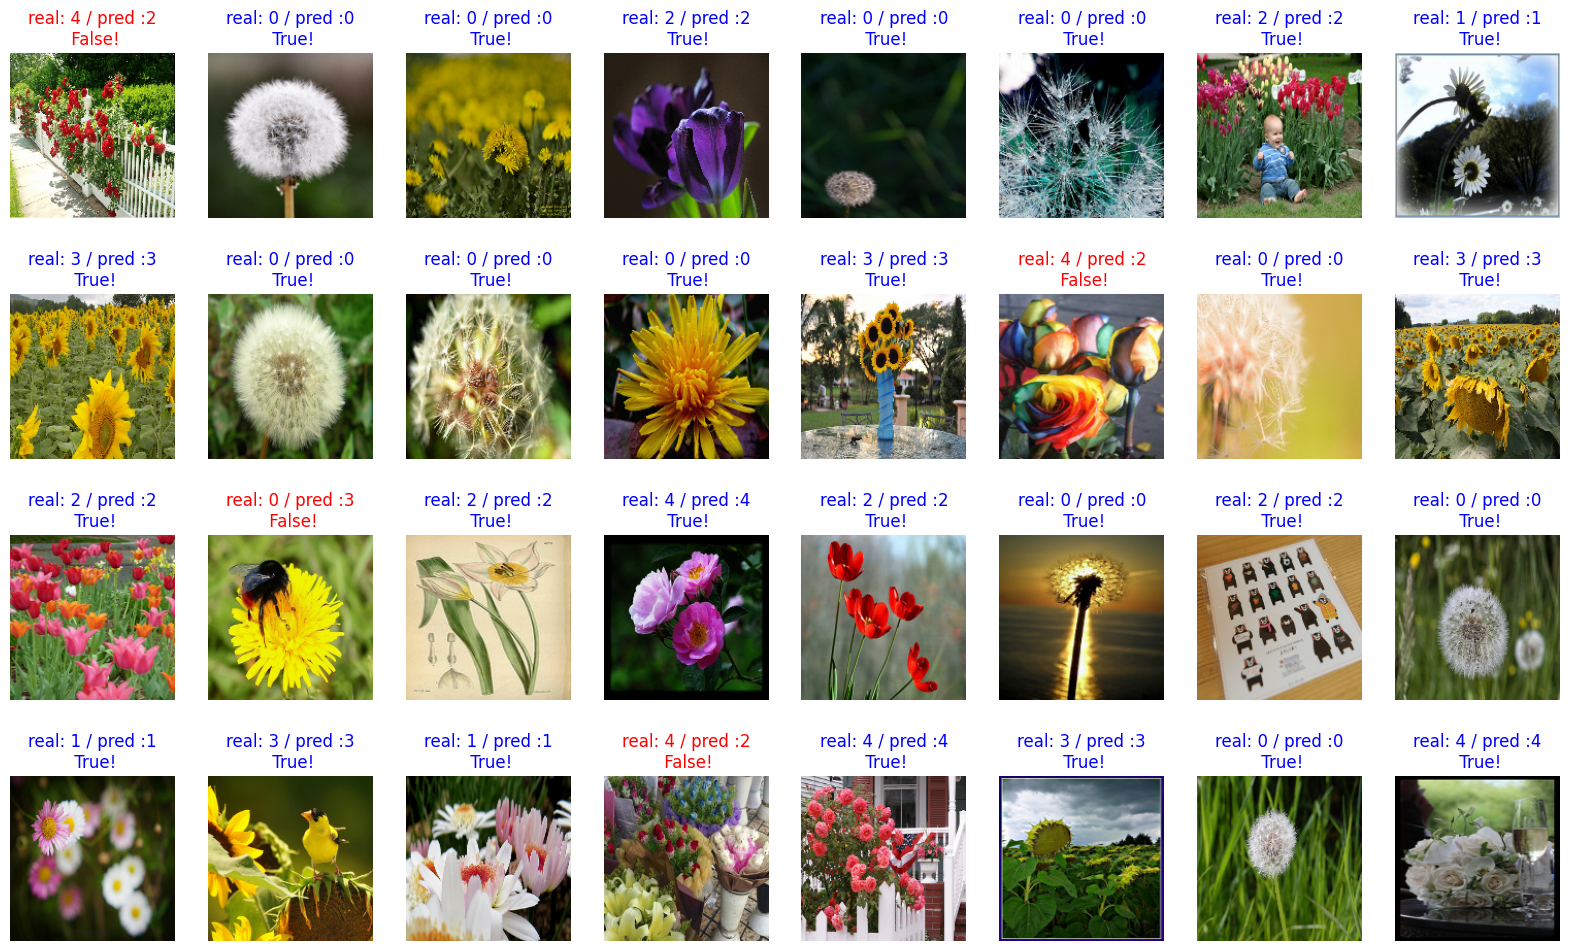

In [24]:
plt.figure(figsize=(20, 12))

for idx, (image, label, prediction) in enumerate(zip(images, labels, predictions)):
    plt.subplot(4, 8, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    correct = label == prediction
    title = f'real: {label} / pred :{prediction}\n {correct}!'
    if not correct:
        plt.title(title, fontdict={'color': 'red'})
    else:
        plt.title(title, fontdict={'color': 'blue'})
    plt.axis('off')